In [ ]:
#Load the data
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#Use the drop() method to remove the 'Id' column
data = data.drop('Id', axis=1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#Check for missing values in each column
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
#Use label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Species'] = label_encoder.fit_transform(data['Species'])
data['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [ ]:
#Identify outliers using the `zscore` function from the `scipy.stats` library
from scipy import stats
z_scores = stats.zscore(data)
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
outliers

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [ ]:
#Separate features (a) and target variable (b)
a = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
b = data['Species']

In [ ]:
#Implement Min-Max scaling using the `MinMaxScaler` from scikit-learn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
a_scaled = scaler.fit_transform(a)
a_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [ ]:
#Count the class distribution of target variable
class_distribution =b.value_counts()
print(class_distribution)

0    50
1    50
2    50
Name: Species, dtype: int64


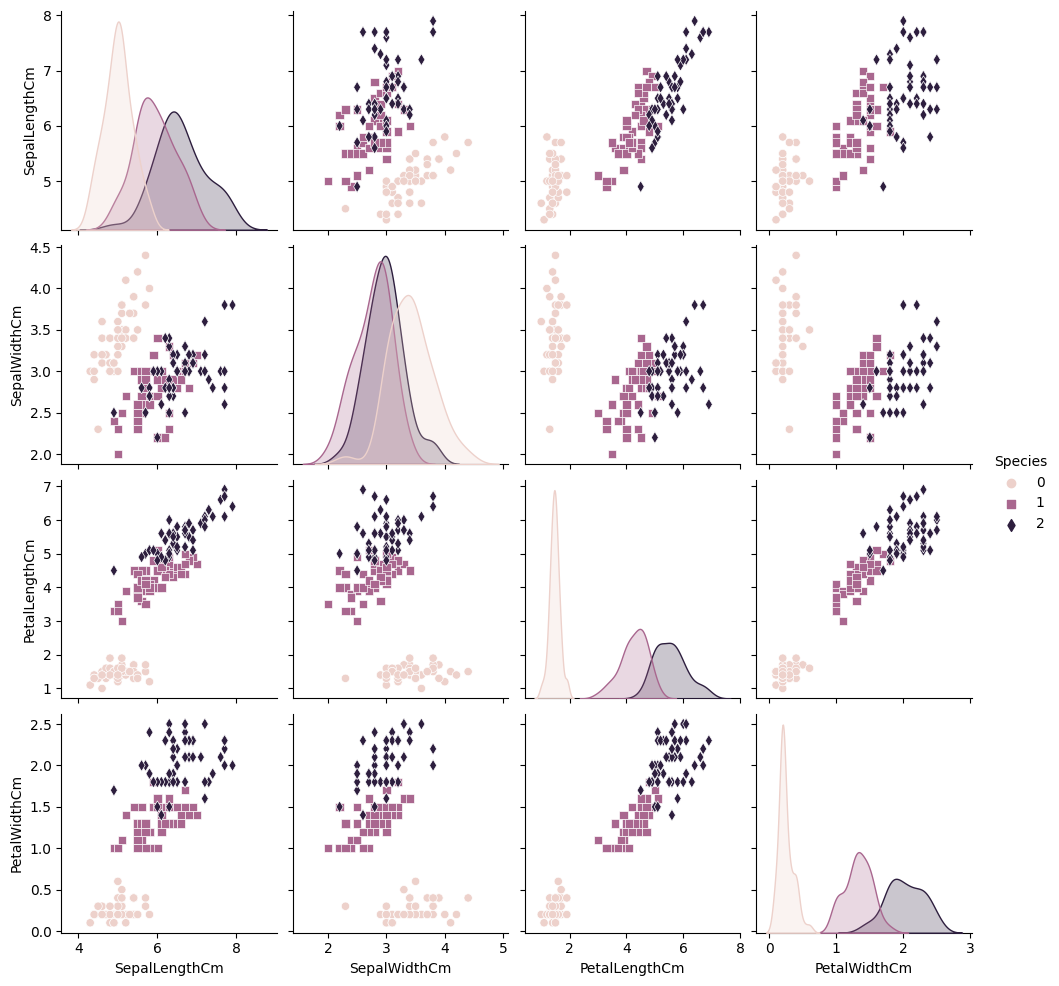

In [ ]:
#Display pair plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data, hue='Species', markers=['o', 's', 'd'])
plt.show()

In [ ]:
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split
a_train,a_test,b_train,b_test=train_test_split(a,b, test_size=0.3, random_state=42)

In [ ]:
#Train the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
k=3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(a_train, b_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
b_pred = knn.predict(a_test)
accuracy = accuracy_score(b_test,b_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(b_test, b_pred))
print(confusion_matrix(b_test,b_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [ ]:
#Use k-fold cross-validation to assess the model's performance on multiple subsets of the data
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, a_train, b_train, cv=5)
scores

array([0.9047619 , 0.9047619 , 0.9047619 , 1.        , 0.95238095])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


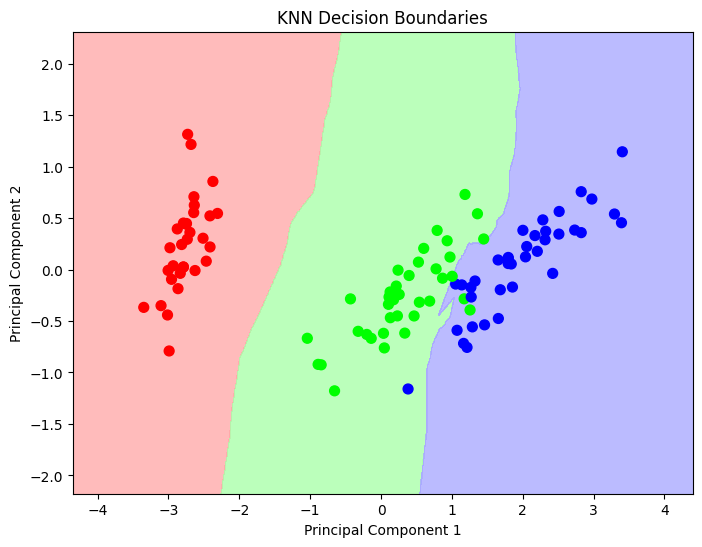

In [ ]:
#Visualize the decision boundaries of this model to see whether they are overly complex and fitted too closely to the training data or not
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
a_train_2d = pca.fit_transform(a_train)
x_min, x_max = a_train_2d[:, 0].min() - 1, a_train_2d[:, 0].max() + 1
y_min, y_max = a_train_2d[:, 1].min() - 1, a_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = knn.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
plt.scatter(a_train_2d[:, 0], a_train_2d[:, 1], c=b_train, cmap=cmap_bold, marker='o', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Decision Boundaries')
plt.show()

In [ ]:
#Make predictions on new data
new_data = pd.DataFrame({'SepalLengthCm': [7.9], 'SepalWidthCm': [32.2], 'PetalLengthCm': [4.7], 'PetalWidthCm': [17.4]})
predicted_species = knn.predict(new_data)
print(f"Predicted species: {predicted_species[0]}")

Predicted species: 2
